<h1 style="text-align:center"> Rain Prediction in Australia</h1>
<img src="https://img.freepik.com/free-vector/woman-with-umbrella-girl-raincoat-dog-walking-rain-city-park-vector-illustration-family-activity-bad-weather-downpour-concept_74855-13290.jpg?w=2000" alt="rain" width = "500"/>

# About the data set

The original source of the data is Australian Government's Bureau of Meteorology and the latest data can be gathered from [http://www.bom.gov.au/climate/dwo/](http://www.bom.gov.au/climate/dwo/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01).

The dataset to be used has extra columns like 'RainToday' and our target is 'RainTomorrow', which was gathered from the Rattle at [https://bitbucket.org/kayontoga/rattle/src/master/data/weatherAUS.RData](https://bitbucket.org/kayontoga/rattle/src/master/data/weatherAUS.RData?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01)

## **Import the required libraries**

In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix, accuracy_score
import sklearn.metrics as metrics

### Importing the Dataset

In [2]:
df = pd.read_csv("Weather_Data.csv")
df.head()

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2/1/2008,19.5,22.4,15.6,6.2,0.0,W,41,S,SSW,...,92,84,1017.6,1017.4,8,8,20.7,20.9,Yes,Yes
1,2/2/2008,19.5,25.6,6.0,3.4,2.7,W,41,W,E,...,83,73,1017.9,1016.4,7,7,22.4,24.8,Yes,Yes
2,2/3/2008,21.6,24.5,6.6,2.4,0.1,W,41,ESE,ESE,...,88,86,1016.7,1015.6,7,8,23.5,23.0,Yes,Yes
3,2/4/2008,20.2,22.8,18.8,2.2,0.0,W,41,NNE,E,...,83,90,1014.2,1011.8,8,8,21.4,20.9,Yes,Yes
4,2/5/2008,19.7,25.7,77.4,4.8,0.0,W,41,NNE,W,...,88,74,1008.3,1004.8,8,8,22.5,25.5,Yes,Yes


### Data Preprocessing

#### One Hot Encoding
First, we need to perform one hot encoding to convert categorical variables to binary variables.


In [3]:
df_sydney_processed = pd.get_dummies(data=df, columns=['RainToday', 'WindGustDir', 'WindDir9am', 'WindDir3pm'])

Next, we replace the values of the 'RainTomorrow' column changing them from a categorical column to a binary column. We do not use the get_dummies method because we would end up with two columns for 'RainTomorrow' and we do not want, since 'RainTomorrow' is our target.

In [4]:
df_sydney_processed.replace(['No', 'Yes'], [0,1], inplace=True)

### Training Data and Test Data
Now, we set our 'features' or x values and our Y or target variable.

In [5]:
df_sydney_processed.drop('Date',axis=1,inplace=True)

In [6]:
df_sydney_processed = df_sydney_processed.astype(float)

In [7]:
features = df_sydney_processed.drop(columns='RainTomorrow', axis=1)
Y = df_sydney_processed['RainTomorrow']

### Linear Regression

#### We will use the `train_test_split` function to split the `features` and `Y` dataframes with a `test_size` of `0.2` and the `random_state` set to `10`.

In [8]:
x_train, x_test, Y_train, Y_test = train_test_split(features, Y, test_size=.2, random_state=10)

In [9]:
x_train.shape, x_test.shape, Y_train.shape, Y_test.shape 

((2616, 66), (655, 66), (2616,), (655,))

In [10]:
from sklearn.linear_model import LinearRegression
LinearReg = LinearRegression()
LinearReg.fit(x_train, Y_train)
print ('Coefficients: ', LinearReg.coef_)

Coefficients:  [-2.36925393e-02  1.30046121e-02  7.29888254e-04  6.49078462e-03
 -3.51637153e-02  4.23750128e-03  1.82941081e-03  7.90294691e-04
  9.55965845e-04  8.56104684e-03  7.69898441e-03 -9.24528166e-03
 -8.86773242e-03  1.00432791e-02  1.44650223e-02 -3.47819778e-03
  1.11994049e+10  1.11994049e+10 -2.22756846e+09 -2.22756846e+09
 -2.22756846e+09 -2.22756846e+09 -2.22756846e+09 -2.22756846e+09
 -2.22756846e+09 -2.22756846e+09 -2.22756846e+09 -2.22756846e+09
 -2.22756846e+09 -2.22756846e+09 -2.22756846e+09 -2.22756846e+09
 -2.22756846e+09 -2.22756846e+09  9.26835840e+09  9.26835840e+09
  9.26835840e+09  9.26835840e+09  9.26835840e+09  9.26835840e+09
  9.26835840e+09  9.26835840e+09  9.26835840e+09  9.26835840e+09
  9.26835840e+09  9.26835840e+09  9.26835840e+09  9.26835840e+09
  9.26835840e+09  9.26835840e+09  4.40422222e+09  4.40422222e+09
  4.40422222e+09  4.40422222e+09  4.40422222e+09  4.40422222e+09
  4.40422222e+09  4.40422222e+09  4.40422222e+09  4.40422222e+09
  4.404222

#### We created and trained a Linear Regression model called LinearReg using the training data (`x_train`, `y_train`).


#### Now we will use the `predict` method on the testing data (`x_test`) and save it to the array `predictions`.


In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

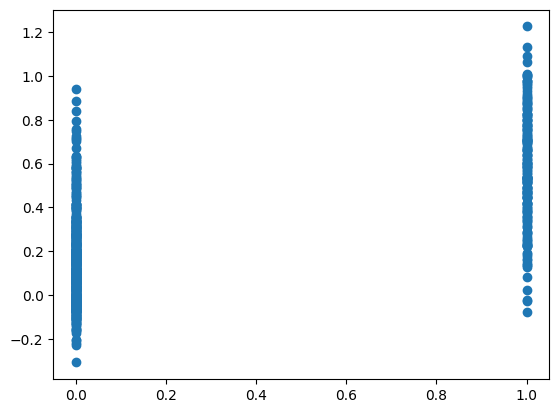

In [12]:
predictions=0
predictions = LinearReg.predict(x_test)
plt.scatter(Y_test, predictions)

In [16]:
from sklearn import metrics
LinearRegression_MAE = metrics.mean_absolute_error(Y_test, predictions)
LinearRegression_MSE = metrics.mean_squared_error(Y_test, predictions)
LinearRegression_R2 = np.sqrt(metrics.mean_squared_error(Y_test, predictions))

print("LinearRegression_MAE:", LinearRegression_MAE, ", LinearRegression_MSE:", LinearRegression_MSE, ", LinearRegression_R2: ", LinearRegression_R2)

LinearRegression_MAE: 0.25631893245318466 , LinearRegression_MSE: 0.11572176083177683 , LinearRegression_R2:  0.3401790129208103


In [17]:
Report = {"Metrics":["MAE","MSE","R2"],"Result": 
[LinearRegression_MAE,LinearRegression_MSE,LinearRegression_R2]}
pd.DataFrame(Report)

,Metrics,Result
0,MAE,0.256319
1,MSE,0.115722
2,R2,0.340179


### KNN

In [18]:
k = 4
KNN = KNeighborsClassifier(n_neighbors = k).fit(x_train,Y_train)
KNN

KNeighborsClassifier(n_neighbors=4)

In [19]:
predictions2 = KNN.predict(x_test)
predictions2[0:5]

C:\Users\Admin123\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


array([0., 0., 1., 0., 0.])

In [20]:
KNN_Accuracy_Score = metrics.accuracy_score(Y_test, predictions2)
KNN_JaccardIndex = jaccard_score(Y_test, predictions2,pos_label=0)
KNN_F1_Score = f1_score(Y_test, predictions2, pos_label=1, average='binary')

Report2 = {"Metrics KNN":["Accuracy","JaccardIndex","F1Score"],"Result": 
[KNN_Accuracy_Score ,KNN_JaccardIndex,KNN_F1_Score]}
pd.DataFrame(Report2)

,Metrics KNN,Result
0,Accuracy,0.818321
1,JaccardIndex,0.790123
2,F1Score,0.596610


### Decision Tree

In [21]:
from sklearn import tree
Tree = tree.DecisionTreeClassifier()
Tree= Tree.fit(x_train, Y_train)
Tree

DecisionTreeClassifier()

In [22]:
predictions3 = Tree.predict(x_test)
predictions3

array([0., 0., 1., 0., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1.,
       0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0.,
       1., 1., 1., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 1., 0., 0., 0.,
       0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1.,
       0., 0., 0., 0., 1.

In [23]:
Tree_Accuracy_Score =  metrics.accuracy_score(Y_test, predictions3)
Tree_JaccardIndex = jaccard_score(Y_test, predictions3,pos_label=0)
Tree_F1_Score = f1_score(Y_test, predictions3, pos_label=1, average='binary')


Report3 = {"Metrics Tree":["Accuracy","JaccardIndex","F1Score"],"Result": 
[Tree_Accuracy_Score ,Tree_JaccardIndex,Tree_F1_Score]}
pd.DataFrame(Report3)

,Metrics Tree,Result
0,Accuracy,0.758779
1,JaccardIndex,0.712204
2,F1Score,0.572973


### Logistic Regression

In [24]:
x_train2, x_test2, Y_train2, Y_test2 = train_test_split(features, Y, test_size=.2, random_state=1)
x_train2.shape, x_test2.shape, Y_train2.shape, Y_test2.shape

((2616, 66), (655, 66), (2616,), (655,))

In [25]:
LR = LogisticRegression(C=1.0, solver='liblinear').fit(x_train2,Y_train2)
print ('Coefficients: ', LR.coef_)

Coefficients:  [[-1.80550751e-01  3.66942140e-02  1.17817000e-02  8.18916043e-03
  -2.27035998e-01  3.58092893e-02  9.82734738e-03  7.70707709e-03
   2.60956829e-02  5.13694077e-02  7.63886061e-02 -8.42114680e-02
  -1.15761375e-01  1.67242616e-01  1.59649898e-01  1.58419614e-02
  -1.39503085e-01  1.83794046e-01  6.32231107e-01 -1.10430465e+00
   4.17801173e-01 -4.47782652e-01 -3.24135942e-01 -5.20566763e-01
  -1.09744429e-01  6.14114167e-04 -5.14322517e-02  5.88539648e-01
   1.71383527e-01 -1.19451537e-02  1.74822995e-01 -1.78220789e-01
   5.82399286e-01  2.24631747e-01  2.58188023e-01  1.48662148e-01
  -3.00126038e-03 -8.71896043e-02 -8.95183249e-02  1.42799407e-01
  -1.47331249e-02  3.31250835e-01 -3.24052325e-01  5.36320698e-03
  -6.20637773e-02 -1.79262662e-01  1.62972152e-01 -1.51978002e-02
   2.03951239e-02 -2.50321056e-01 -6.46586933e-01 -5.49063855e-01
  -1.52580162e-02 -5.52020511e-01 -3.52988482e-01  3.05655448e-01
   1.88848520e-01 -2.61947648e-01  6.86307474e-01  2.63408422

In [26]:
predictions4 = LR.predict(x_test2)
predictions4

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1.,
       0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       1., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1.,
       0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.,
       0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 1.,
       0., 0., 1., 0., 0., 1., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 1., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 1., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0.,
       1., 0., 1., 1., 0.

In [27]:
LR_Accuracy_Score = metrics.accuracy_score(Y_test2, predictions4)
LR_JaccardIndex = jaccard_score(Y_test2, predictions4,pos_label=0)
LR_F1_Score = f1_score(Y_test2, predictions4, pos_label=1, average='binary')
LR_Log_Loss = log_loss(Y_test2, predictions4)

Report4 = {"Metrics Logistic Regression":["Accuracy","JaccardIndex","F1Score","LogLoss"],"Result": 
[LR_Accuracy_Score ,LR_JaccardIndex, LR_F1_Score,LR_Log_Loss]}
pd.DataFrame(Report4)

,Metrics Logistic Regression,Result
0,Accuracy,0.836641
1,JaccardIndex,0.803309
2,F1Score,0.674772
3,LogLoss,5.642256


### SVM

In [28]:
from sklearn import svm
SVM = svm.SVC(kernel='rbf')
SVM.fit(x_train2, Y_train2) 

SVC()

In [29]:
predictions5 = SVM.predict(x_test2)
predictions5 [0:5]

array([0., 0., 0., 0., 0.])

In [30]:
SVM_Accuracy_Score = metrics.accuracy_score(Y_test2, predictions5)
SVM_JaccardIndex = jaccard_score(Y_test2, predictions5,pos_label=0)
SVM_F1_Score = f1_score(Y_test2, predictions5, pos_label=1, average='binary')

Report5 = {"Metrics SVM":["Accuracy","JaccardIndex","F1Score"],"Result": 
[SVM_Accuracy_Score ,SVM_JaccardIndex, SVM_F1_Score]}
pd.DataFrame(Report5)

,Metrics SVM,Result
0,Accuracy,0.722137
1,JaccardIndex,0.722137
2,F1Score,0.000000


### Final Report
Show the Accuracy,Jaccard Index,F1-Score and LogLoss in a tabular format using data frame for all of the above models.


In [31]:
ReportFinal = {"Total Metrics SVM":["Accuracy","JaccardIndex","F1Score","LogLoss"],"Result Metrics KNN": 
[KNN_Accuracy_Score ,KNN_JaccardIndex,KNN_F1_Score,""],"Result Metrics Tree":[Tree_Accuracy_Score ,Tree_JaccardIndex,Tree_F1_Score,""], "Result Metrics Logistic Reg": [LR_Accuracy_Score ,LR_JaccardIndex, LR_F1_Score,LR_Log_Loss], "Results Metrics SVM":[SVM_Accuracy_Score ,SVM_JaccardIndex, SVM_F1_Score,""]}
pd.DataFrame(ReportFinal)

,Total Metrics SVM,Result Metrics KNN,Result Metrics Tree,Result Metrics Logistic Reg,Results Metrics SVM
0,Accuracy,0.818321,0.758779,0.836641,0.722137
1,JaccardIndex,0.790123,0.712204,0.803309,0.722137
2,F1Score,0.59661,0.572973,0.674772,0.0
3,LogLoss,,,5.642256,
